1️⃣ [Soal] Setup & Import Library
- Deskripsi:
- Pada tahap ini, kamu akan mengimpor semua library Python yang dibutuhkan untuk analisis data spasial dan statistik.

Soal:

1. Import semua library yang diperlukan untuk analisis data spasial dan statistik.
2. Jelaskan fungsi utama masing-masing library!

Hint:
Gunakan pandas, geopandas, folium, matplotlib, seaborn, numpy, dan shapely.

In [3]:
# Jalankan di terminal jika belum install
import pandas as pd
import geopandas as gpd
import folium
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from shapely.geometry import Polygon, Point


2️⃣ [Soal] Load Data GeoJSON
- Deskripsi:
- Baca data pluvial flood point south west Nigeria dari file GeoJSON menggunakan geopandas.

Soal:

1. Load file data_point_pluvial_flood_dataset.geojson ke dalam GeoDataFrame.
2. Tampilkan 5 baris pertama data.

Hint:
Gunakan gpd.read_file(path) dan head().

In [2]:
geojson_path = r"../assets/data_point_pluvial_flood_dataset.geojson"

# Load data
gdf_geojson = gpd.read_file(geojson_path)
print(gdf_geojson.head())

          X         Y      Slope    Curvature       Aspect       TWI     FA  \
0  3.909444  7.443056  46.686142 -3.888000e+09   45.000000 -3.250368  147.0   
1  3.908611  7.442778  52.151768  1.296000e+09   60.945396 -4.313832   61.0   
2  3.908889  7.442778  66.484085  0.000000e+00   67.619865 -8.327622    1.0   
3  3.909167  7.442778  58.007183 -2.592000e+09   38.659809 -4.707937   51.0   
4  3.909444  7.442778  60.503792 -1.296000e+09  351.869904 -5.985817   15.0   

   Drainage    Rainfall     SUSCEP                 geometry  
0  228.8528  101.515616  Very_High  POINT (3.90944 7.44306)  
1  229.6781   80.409863  Very_High  POINT (3.90861 7.44278)  
2  230.5920   78.986849  Very_High  POINT (3.90889 7.44278)  
3  235.4210   81.953151  Very_High  POINT (3.90917 7.44278)  
4  234.4346   85.866027  Very_High  POINT (3.90944 7.44278)  


3️⃣ [Soal] Eksplorasi Struktur Data
- Deskripsi:
- Lakukan eksplorasi awal untuk memahami struktur dan tipe data.

Soal:

1. Tampilkan info DataFrame (kolom, tipe data, jumlah data).
2. Tampilkan statistik deskriptif untuk parameter numerik.

Hint:

Gunakan info() dan describe().

In [4]:
# 1. Tampilkan informasi struktur DataFrame (kolom, tipe data, jumlah data non-null)
gdf_geojson.info()

# 2. Tampilkan statistik deskriptif untuk kolom numerik
print(gdf_geojson.describe())

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 144401 entries, 0 to 144400
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   X           144401 non-null  float64 
 1   Y           144401 non-null  float64 
 2   Slope       144119 non-null  float64 
 3   Curvature   144401 non-null  float64 
 4   Aspect      144401 non-null  float64 
 5   TWI         144401 non-null  float64 
 6   FA          144401 non-null  float64 
 7   Drainage    144401 non-null  float64 
 8   Rainfall    144401 non-null  float64 
 9   SUSCEP      144401 non-null  str     
 10  geometry    144401 non-null  geometry
dtypes: float64(9), geometry(1), str(1)
memory usage: 12.1 MB
                   X              Y         Slope    Curvature         Aspect  \
count  144401.000000  144401.000000  1.441190e+05  1.444010e+05  1.444010e+05   
mean        3.891534       7.374551 -2.502788e+35 -8.342043e+35 -1.673122e+35   
std         0.027

4️⃣ [Soal] Visualisasi Distribusi Parameter
- Deskripsi:
- Visualisasikan distribusi beberapa parameter penting (misal: Slope, Rainfall, TWI).

Soal:

1. Buat histogram untuk parameter Slope dan Rainfall.
2. Apa yang bisa kamu simpulkan dari distribusi data tersebut?

Hint:
Gunakan sns.histplot() dan plt.show().

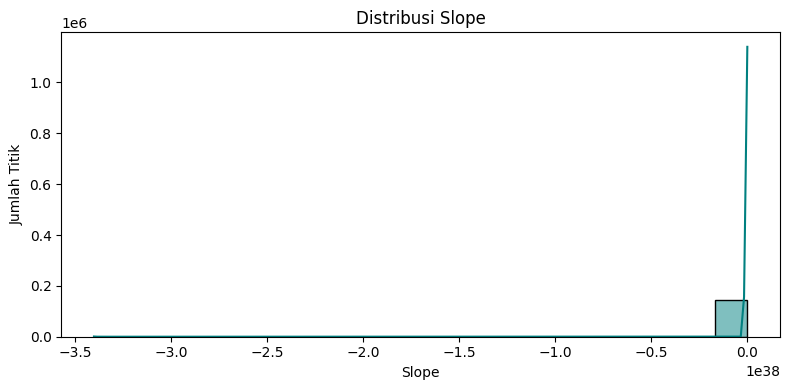

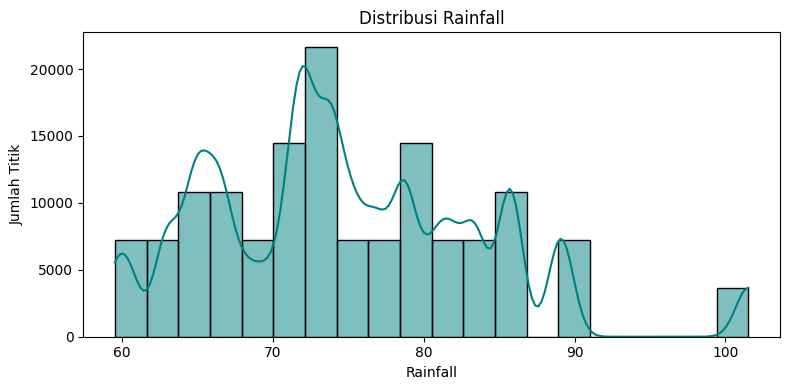

In [12]:
# Histogram untuk Slope
plt.figure(figsize=(8, 4))
sns.histplot(gdf_geojson['Slope'], bins=20, kde=True, color='teal')
plt.title('Distribusi Slope')
plt.xlabel('Slope')
plt.ylabel('Jumlah Titik')
plt.tight_layout()
plt.show()

# Histogram untuk Rainfall
plt.figure(figsize=(8, 4))
sns.histplot(gdf_geojson['Rainfall'], bins=20, kde=True, color='teal')
plt.title('Distribusi Rainfall')
plt.xlabel('Rainfall')
plt.ylabel('Jumlah Titik')
plt.tight_layout()
plt.show()

5️⃣ [Soal] Analisis Kategori Susceptibility
- Deskripsi:
- Analisis sebaran kategori susceptibility (SUSCEP) pada dataset.

Soal:

1. Hitung jumlah titik per kategori susceptibility.
2. Visualisasikan hasilnya dengan bar chart.

Hint:

Gunakan value_counts() dan sns.countplot().

SUSCEP
Moderate     38116
High         34451
Low          32252
Very_High    23456
No_Flood     16126
Name: count, dtype: int64


/var/folders/mn/wdmjppd97vncktbfppgl01640000gn/T/ipykernel_31830/3912297522.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=gdf_geojson, x='SUSCEP', order=susceptibility_counts.index, palette='viridis')


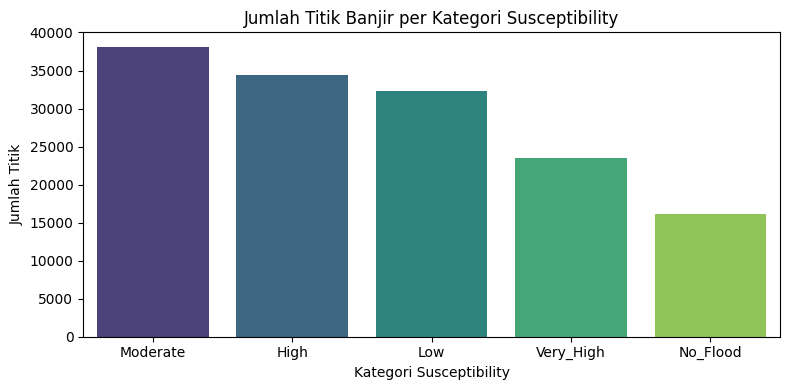

In [13]:
# 1. Hitung jumlah titik per kategori susceptibility
susceptibility_counts = gdf_geojson['SUSCEP'].value_counts()
print(susceptibility_counts)

# 2. Visualisasikan dengan bar chart
plt.figure(figsize=(8, 4))
sns.countplot(data=gdf_geojson, x='SUSCEP', order=susceptibility_counts.index, palette='viridis')
plt.title('Jumlah Titik Banjir per Kategori Susceptibility')
plt.xlabel('Kategori Susceptibility')
plt.ylabel('Jumlah Titik')
plt.tight_layout()
plt.show()

6️⃣ [Soal] Scatter Plot Hubungan Parameter
- Deskripsi:
- Analisis hubungan antara dua parameter, misal Slope vs Rainfall.

Soal:

1. Buat scatter plot antara Slope dan Rainfall.
2. Apakah ada pola tertentu yang terlihat?

Hint:

Gunakan sns.scatterplot().

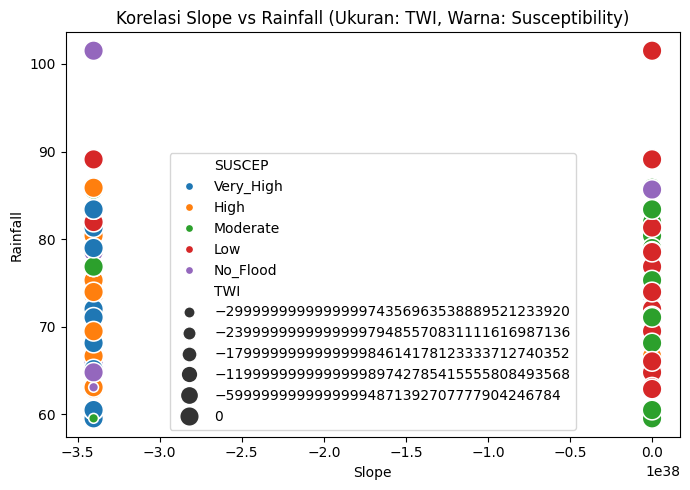

In [20]:
plt.figure(figsize=(7, 5))
sns.scatterplot(
    x='Slope', y='Rainfall',
    data=gdf_geojson,
    hue='SUSCEP',          # mewarnai berdasarkan kategori susceptibility
    size='TWI',            # ukuran titik berdasarkan Topographic Wetness Index (jika ada)
    sizes=(50, 200),       # rentang ukuran titik
    palette='tab10'
)
plt.title('Korelasi Slope vs Rainfall (Ukuran: TWI, Warna: Susceptibility)')
plt.xlabel('Slope')
plt.ylabel('Rainfall')
plt.tight_layout()
plt.show()

7️⃣ [Soal] Heatmap Korelasi Parameter
- Deskripsi:
- Lihat korelasi antar parameter numerik pada dataset.

Soal:

1. Hitung matriks korelasi antar parameter numerik.
2. Visualisasikan dengan heatmap.

Hint:

Gunakan corr() dan sns.heatmap().

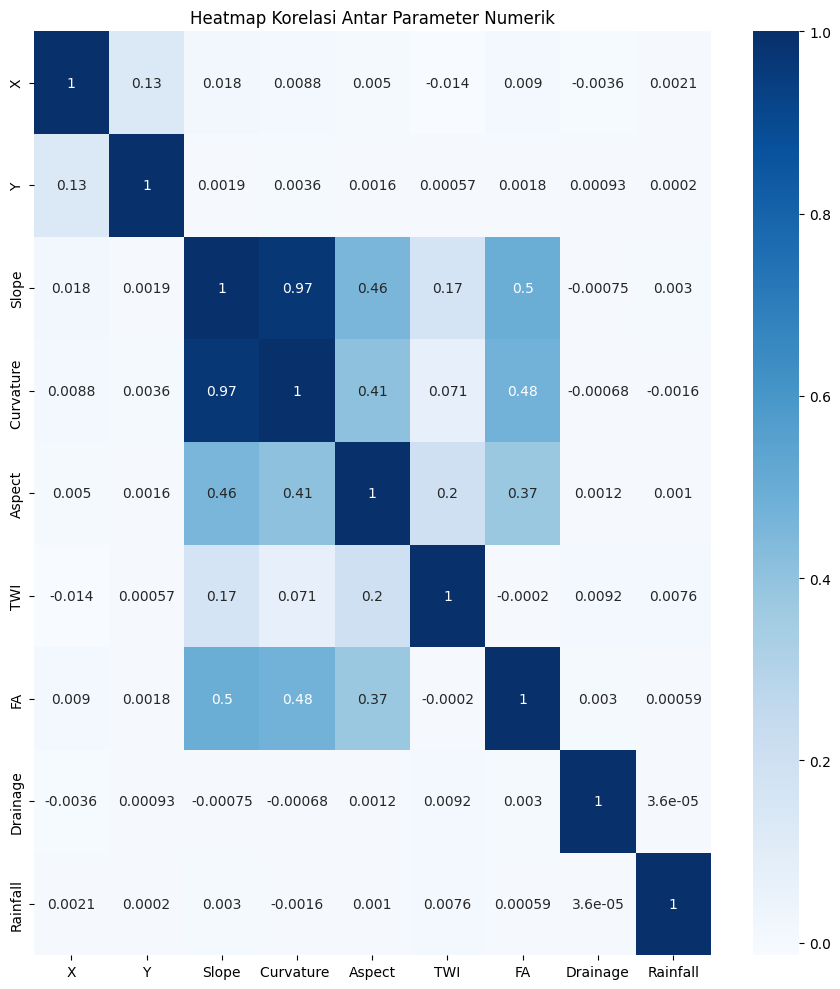

In [24]:
# 1. Pilih hanya kolom numerik (kecuali geometri) dan hitung matriks korelasi
numeric_cols = gdf_geojson.select_dtypes(include=[np.number]).columns
corr_matrix = gdf_geojson[numeric_cols].corr()

# 2. Visualisasikan dengan heatmap
plt.figure(figsize=(9, 10))
sns.heatmap(corr_matrix, annot=True, cmap='Blues')
plt.title('Heatmap Korelasi Antar Parameter Numerik')
plt.tight_layout()
plt.show()

8️⃣ [Soal] Peta Interaktif Titik Flood
- Deskripsi:
- Pada tahap ini, kamu akan membuat peta interaktif yang hanya menampilkan sebagian kecil titik flood dari dataset (bukan seluruh data dan tanpa analisis outlier).
- Tujuannya agar peta lebih informatif, tidak terlalu padat, dan mudah dianalisis.

Soal:

1. Pilih dan filter data flood yang ingin divisualisasikan (misal: 5 titik acak dari seluruh dataset).
2. Buat peta interaktif yang hanya menampilkan titik-titik hasil filter.
3. Tambahkan popup/tooltip pada setiap marker yang menampilkan nilai susceptibility dan parameter penting (misal: Slope, Rainfall, TWI).
4. Simpan peta sebagai file HTML dan pastikan bisa dibuka di browser.

Hint:

1. Gunakan metode filter DataFrame seperti .sample(n) untuk mengambil n titik acak.
2. Gunakan folium.Map(), folium.Marker(), dan folium.Popup() untuk visualisasi.
3. Simpan peta dengan m.save('nama_file.html').

In [25]:
# Ambil 5 titik acak dari dataset
gdf_sample = gdf_geojson.sample(n=5, random_state=42).copy()

# Pastikan CRS dalam WGS84 (latitude/longitude)
gdf_sample = gdf_sample.to_crs(epsg=4326)

# Ekstrak koordinat
gdf_sample['lon'] = gdf_sample.geometry.x
gdf_sample['lat'] = gdf_sample.geometry.y

# Hitung pusat peta
center_lat = gdf_sample['lat'].mean()
center_lon = gdf_sample['lon'].mean()

# Buat peta dasar
m = folium.Map(location=[center_lat, center_lon], zoom_start=10, tiles='OpenStreetMap')

# Tambahkan marker untuk setiap titik sampel
for idx, row in gdf_sample.iterrows():
    popup_text = f"""
    <b>Susceptibility:</b> {row['SUSCEP']}<br>
    <b>Slope:</b> {row['Slope']:.2f}<br>
    <b>Rainfall:</b> {row['Rainfall']:.2f}<br>
    <b>TWI:</b> {row['TWI']:.2f}
    """
    folium.Marker(
        location=[row['lat'], row['lon']],
        popup=folium.Popup(popup_text, max_width=250),
        tooltip=f"Titik {idx}",
        icon=folium.Icon(color='blue', icon='tint')  # ikon relevan untuk banjir
    ).add_to(m)

# Panel kesimpulan (opsional, tapi sesuai gaya contoh Anda)
kesimpulan_html = f"""
<b>Kesimpulan Visualisasi Titik Banjir Pluvial:</b><br>
- Menampilkan <b>5 titik acak</b> dari dataset flood di Southwest Nigeria.<br>
- Setiap marker menunjukkan nilai <b>Susceptibility, Slope, Rainfall, dan TWI</b>.<br>
- Peta ini bertujuan memberikan gambaran spasial tanpa kepadatan berlebih.<br>
- Data tidak mencakup seluruh titik untuk menjaga keterbacaan.
"""

from folium import Html, Popup, Marker
html_panel = Html(kesimpulan_html, script=True)
popup_panel = Popup(html_panel, max_width=400)
Marker(
    location=[center_lat, center_lon],
    popup=popup_panel,
    icon=folium.Icon(color='green', icon='info-sign')
).add_to(m)

# Simpan ke file HTML
m.save('peta_flood_interaktif.html')
print("Peta interaktif dengan 5 titik flood acak berhasil disimpan sebagai 'peta_flood_interaktif.html'. Silakan buka file ini di browser.")

Peta interaktif dengan 5 titik flood acak berhasil disimpan sebagai 'peta_flood_interaktif.html'. Silakan buka file ini di browser.
